# 🧠 Unleashing Insights: Sales Analysis of Pet Store Transactions

An end-to-end data analysis project on pet store transactions to identify high-performing product categories using the OSEMN data science framework (Obtain, Scrub, Explore, Model, Interpret).


## 📌 Project Overview

**Dataset:** `transactions-pet_store.csv`  
**Objective:** Analyze sales patterns to identify best-selling product categories by pet type and offer actionable recommendations.  
**Tools:** Python (pandas, matplotlib, seaborn)


### 📦 Step 1: Import Required Libraries



In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Data
df = pd.read_csv('transactions-pet_store.csv')
df_orig = df.copy()


In [7]:
#Get an overview of the data
df.head()

,Date,Order_Number,Customer_ID,Product_Name,SKU,Price,Quantity,Product_Category,Product_Line,Size
0,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Feline Fix Mix,RKAPY3I1TP,39.55,1,treat,cat,NaN
1,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Scratchy Post,MPH6SCD7UT,26.95,3,toy,cat,NaN
2,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Reddy Beddy,DJWE1V9LZK,23.07,3,bedding,dog,NaN
3,3/23/2020,DG7-5410-5845-1340,5929a0e9-95a7-4dbf-896e-c11d1988615e,Snoozer Essentails,GABWVMEL2R,28.04,3,bedding,dog,S
4,3/23/2020,DG7-5410-5845-1340,5929a0e9-95a7-4dbf-896e-c11d1988615e,Reddy Beddy,KDTMPSBZKZ,13.84,1,bedding,dog,NaN


### 🧼 Step 2: Data Scrubbing

#### 2.1 Remove Rows with Missing `Product_Name` or `Product_Category`
These fields are essential for categorizing transactions, so we'll remove any rows missing them.


In [8]:
#Assigned the cleaned DataFrame to the variable df
#Checked if there are no null values

df = df[~df['Product_Name'].isna() & ~df['Product_Category'].isna()]
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2716 entries, 0 to 2715
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              2716 non-null   object 
 1   Order_Number      2716 non-null   object 
 2   Customer_ID       2716 non-null   object 
 3   Product_Name      2716 non-null   object 
 4   SKU               2716 non-null   object 
 5   Price             2716 non-null   float64
 6   Quantity          2716 non-null   int64  
 7   Product_Category  2716 non-null   object 
 8   Product_Line      2716 non-null   object 
 9   Size              261 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 212.3+ KB


#### 2.2 Fix Incorrect Pricing
Some price values were negative or incorrect due to data entry issues. We'll correct them below.


In [4]:
price_negative = df['Price'] <0
df.loc[price_negative, 'Price'] = -1 * df.loc[price_negative, 'Price']
df.loc[42, 'Price'] = 19.873
df.loc[67, 'Price'] = 19.873
df.max()


Date                          9/9/2020
Order_Number        ZZD-0808-1377-2425
Product_Name             Yum Fish-Dish
SKU                         W86BRJ9SSG
Price                            39.55
Quantity                             3
Product_Category                 treat
Product_Line                       dog
dtype: object

#### 2.3 Drop Columns with Excessive Missing Values
We'll remove the `Size` column since it has over 500 missing values.


In [9]:
df = df.drop(columns =['Size'])



#### 2.4 Handle Remaining Missing Values
The only remaining column with nulls is `Customer_ID`, which we'll drop from the rows.


In [8]:
df = df[~df['Customer_ID'].isna()]




### 🔍 Step 3: Data Exploration

#### 3.1 Calculate Transaction Subtotals
We create a new column `Subtotal` to capture the total transaction value per row.


In [10]:
#Loaded the cleaned Data
df = pd.read_csv('transactions-pet_store-clean.csv')

#### 2.5 Feature Engineering: Create `Subtotal` Column

To support further analysis, we'll engineer a new feature called `Subtotal`. This column represents the total amount spent per transaction row by multiplying `Price` and `Quantity`.


In [11]:
df['Subtotal'] = df.Price * df.Quantity
df


,Date,Order_Number,Customer_ID,Product_Name,SKU,Price,Quantity,Product_Category,Product_Line,Subtotal
0,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Feline Fix Mix,RKAPY3I1TP,39.55,1,treat,cat,39.55
1,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Scratchy Post,MPH6SCD7UT,26.95,3,toy,cat,80.85
2,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Reddy Beddy,DJWE1V9LZK,23.07,3,bedding,dog,69.21
3,3/23/2020,DG7-5410-5845-1340,5929a0e9-95a7-4dbf-896e-c11d1988615e,Snoozer Essentails,GABWVMEL2R,28.04,3,bedding,dog,84.12
4,3/23/2020,DG7-5410-5845-1340,5929a0e9-95a7-4dbf-896e-c11d1988615e,Reddy Beddy,KDTMPSBZKZ,13.84,1,bedding,dog,13.84
...,...,...,...,...,...,...,...,...,...,...
2711,10/16/2020,P8K-8079-0264-6569,468f40b3-59ca-47fd-9739-c7f19cf48f32,Cat Cave,058G0P7V60,29.66,1,bedding,cat,29.66
2712,10/16/2020,P8K-8079-0264-6569,468f40b3-59ca-47fd-9739-c7f19cf48f32,Kitty Climber,W86BRJ9SSG,39.32,1,toy,cat,39.32
2713,10/16/2020,P8K-8079-0264-6569,468f40b3-59ca-47fd-9739-c7f19cf48f32,Fetch Blaster,M291KHJ4LW,29.47,1,toy,dog,29.47
2714,10/16/2020,P8K-8079-0264-6569,468f40b3-59ca-47fd-9739-c7f19cf48f32,Snoozer Essentails,GABWVMEL2R,28.04,1,bedding,dog,28.04


### 🔍 Step 3: Data Exploration

#### 3.1 Calculate Transaction Subtotals
We create a new column `Subtotal` to capture the total transaction value per row.


In [12]:
Product_Line_Cat = df[df['Product_Line'] == 'cat'].groupby('Product_Category')['Quantity'].sum()
Product_Line_Dog = df[df['Product_Line'] == 'dog'].groupby('Product_Category')['Quantity'].sum()
common_category_cat = Product_Line_Cat.idxmax()
common_category_dog = Product_Line_Dog.idxmax()
display(common_category_cat)
display(common_category_dog)


'treat'

'bedding'

#### 3.2 Identify Top-Selling Product Categories by Pet Type
We want to see which product categories are most purchased by customers with cats vs. dogs.


In [13]:
Product_Line_Cat = df[df['Product_Line'] == 'cat'].groupby('Product_Category')['Price'].median()
Product_Line_Dog = df[df['Product_Line'] == 'dog'].groupby('Product_Category')['Price'].median()
priciest_category_cat = Product_Line_Cat.idxmax()
priciest_category_dog = Product_Line_Dog.idxmax()
display(priciest_category_cat)
display(priciest_category_dog)

'bedding'

'toy'

### 🤖 Step 4: Modeling (Skipped)

In this project, I opted not to perform predictive modeling, as the primary objective was exploratory and descriptive analysis.

However, here’s what a modeling step might look like in a future extension of this dataset:

- **Objective**: Predict which product category a customer is likely to purchase based on their past behavior.
- **Possible Models**: Decision Trees, Logistic Regression, or K-Means clustering for customer segmentation.
- **Features**: Product Line, Quantity, Price, Date, Customer ID
- **Target Variable**: Product Category

**Why we skipped modeling:**
- The dataset focuses on transactional records without customer history or temporal depth needed for modeling.
- The stakeholder goal is to **understand current sales performance** rather than predict future purchases.

Future enhancements could include:
- Building a customer-level purchase prediction model
- Recommender system for personalized pet product suggestions
- Time-series sales forecasting per category


### 📈 Step 5: Interpretation & Visualization

#### 5.1 Compare Quantity Sold Across Product Categories
I use a horizontal bar chart to visualize the total quantity sold across product categories, split by pet type.


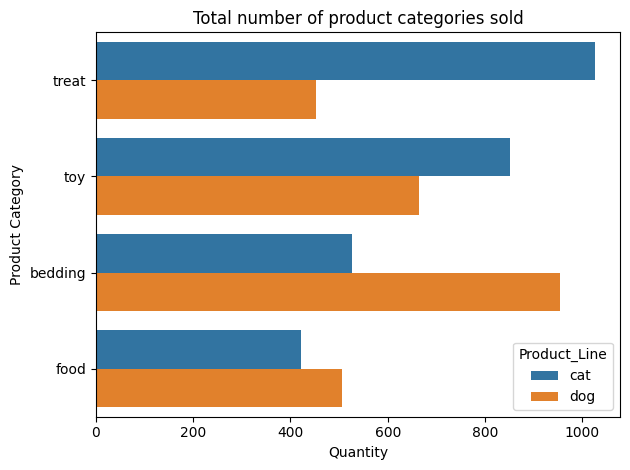

In [14]:
ax = sns.barplot(x='Quantity', y='Product_Category', hue= 'Product_Line', data=df, estimator=sum, errorbar=None)

plt.title('Total number of product categories sold')
plt.xlabel('Quantity')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()


#### 4.2 Stakeholder Insight Summary

> **Key Insight:** Treats for cats and bedding for dogs are the most frequently purchased items.  
> **Recommendation:** Prioritize inventory and marketing efforts on these product categories.


#### 4.3 Enhanced Visualization for Business Presentation
I color-highlight the top-performing categories to make it easier for stakeholders to act on insights.


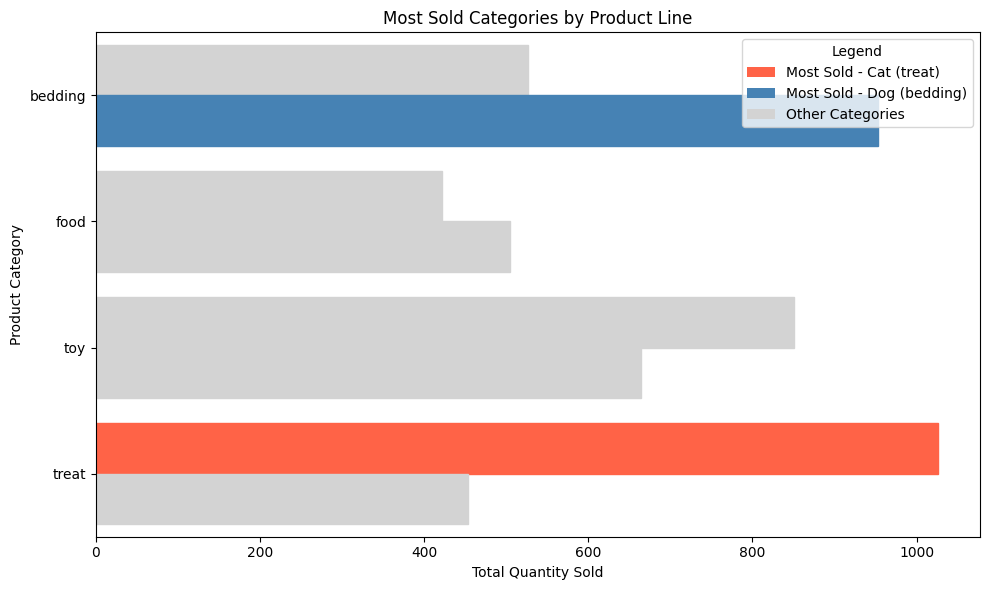

In [27]:
# 1. Group data by Product_Category and Product_Line
grouped = df.groupby(['Product_Category', 'Product_Line'])['Quantity'].sum().reset_index()

# 2. Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=grouped,
    x='Quantity',
    y='Product_Category',
    hue='Product_Line',
    estimator=sum,
    errorbar=None
)

# 3. Identify categories to highlight
highlight_colors = {
    ('food', 'dog'): 'tomato',
    ('toy', 'cat'): 'steelblue'
}

# 4. Recolor bars manually
for bar, (_, row) in zip(ax.patches, grouped.iterrows()):
    key = (row['Product_Category'], row['Product_Line'])
    bar.set_color(highlight_colors.get(key, 'lightgray'))

# 5. Custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='tomato', label='Most Sold - Cat (treat)'),
    Patch(facecolor='steelblue', label='Most Sold - Dog (bedding)'),
    Patch(facecolor='lightgray', label='Other Categories')
]

# 6. Final plot polish
plt.title('Most Sold Categories by Product Line')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Category')
plt.legend(handles=legend_elements, title='Legend')
plt.tight_layout()
plt.show()



## ✅ Final Reflections & Next Steps

This project applied the OSEMN framework to analyze pet store transactions and extract actionable business insights:

- 🧼 **Scrubbed** and cleaned transactional data for analysis readiness  
- 🔍 **Explored** trends in product category performance by animal type  
- 📊 **Visualized** top-performing products for strategic recommendations  
- 🧠 **Interpreted** the results to inform marketing and inventory planning decisions  

While we skipped the modeling step due to the nature of the data, future iterations of this project could include:

- 📈 Time-series forecasting of sales per category  
- 🧩 Customer segmentation using clustering techniques  
- 🛒 Predictive modeling for recommender systems  

---

### 💡 Key Takeaways

- Treats are the top-selling category for **cats**  
- Bedding is the top-selling category for **dogs**  
- Prioritizing these products in inventory and promotions can drive higher revenue  

---

### 📌 What I Learned

- Hands-on experience in data wrangling and cleaning with pandas  
- Structuring a full analysis workflow in Jupyter Notebook  
- Communicating insights with compelling visuals using seaborn and matplotlib  
- Framing analysis in a business-relevant context for stakeholders  

---

📂 This notebook is part of my **Data Analyst Portfolio**.  
🧭 Explore more projects [on my GitHub/Notion/Portfolio site].  
📬 Feel free to connect or reach out to discuss this project further!

